# The Spark Foundation

# Task 1: Prediction using Supervised ML

# Simple linear regression on World war 2(Weather report)

## By : Kumuda D K

In [8]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Loading the data set

In [9]:
Weather =pd.read_csv(r'C:\Users\asus\Desktop\Weather.csv')

climate= pd.DataFrame(Weather)

In [10]:
climate.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the Dataset

In [11]:
to_drop=['Precip','Date','STA','WindGustSpd','Snowfall','PoorWeather', 'PRCP', 'DR', 'YR','MO','DA','SPD', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']
climate.drop(to_drop,inplace=True,axis=1)

In [12]:
climate.isnull().sum()

MaxTemp       0
MinTemp       0
MeanTemp      0
MAX         474
MIN         468
MEA         498
dtype: int64

In [13]:
climate.dropna(axis=1)

,MaxTemp,MinTemp,MeanTemp
0,25.555556,22.222222,23.888889
1,28.888889,21.666667,25.555556
2,26.111111,22.222222,24.444444
3,26.666667,22.222222,24.444444
4,26.666667,21.666667,24.444444
5,26.666667,21.666667,24.444444
6,28.333333,22.777778,25.555556
7,26.666667,22.222222,24.444444
8,27.222222,22.777778,25.000000
9,25.555556,21.666667,23.333333


In [14]:
climate.dtypes

MaxTemp     float64
MinTemp     float64
MeanTemp    float64
MAX         float64
MIN         float64
MEA         float64
dtype: object

In [15]:
climate=climate[~climate['MeanTemp'].isna()]

In [16]:
climate=climate[~climate['MaxTemp'].isna()]

In [17]:
climate=climate[~climate['MinTemp'].isna()]

In [18]:
climate.info()
climate.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119040 entries, 0 to 119039
Data columns (total 6 columns):
MaxTemp     119040 non-null float64
MinTemp     119040 non-null float64
MeanTemp    119040 non-null float64
MAX         118566 non-null float64
MIN         118572 non-null float64
MEA         118542 non-null float64
dtypes: float64(6)
memory usage: 6.4 MB


,MaxTemp,MinTemp,MeanTemp,MAX,MIN,MEA
0,25.555556,22.222222,23.888889,78.0,72.0,75.0
1,28.888889,21.666667,25.555556,84.0,71.0,78.0
2,26.111111,22.222222,24.444444,79.0,72.0,76.0
3,26.666667,22.222222,24.444444,80.0,72.0,76.0
4,26.666667,21.666667,24.444444,80.0,71.0,76.0


# Plotting 

# Data visualization

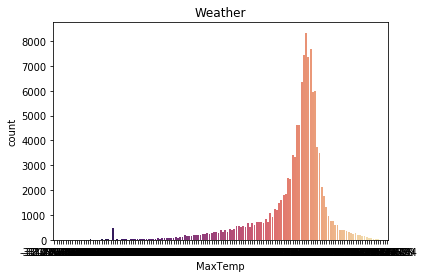

In [19]:
sns.countplot(x = 'MaxTemp', data = climate, palette = 'magma')
plt.title('Weather')
plt.show()

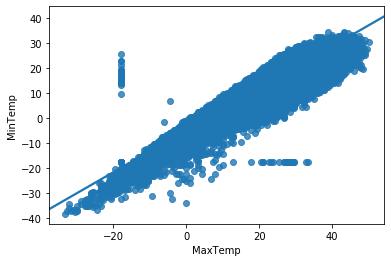

In [20]:
sns.regplot(x="MaxTemp", y="MinTemp", data=climate)

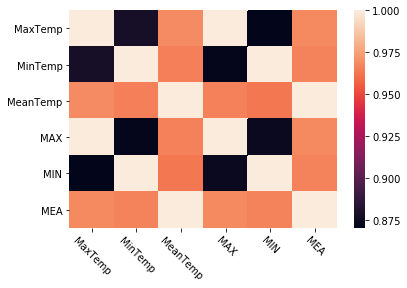

In [21]:
sns.heatmap(climate.corr());# Rotate x-labels with the help of matplotlib
plt.xticks(rotation=-45);


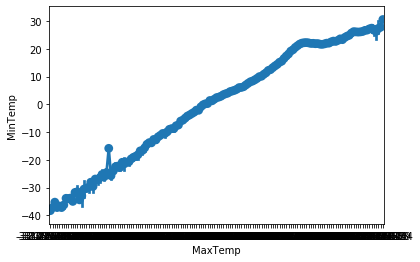

In [22]:
sns.pointplot(x="MaxTemp", y="MinTemp", data=climate)
plt.show()

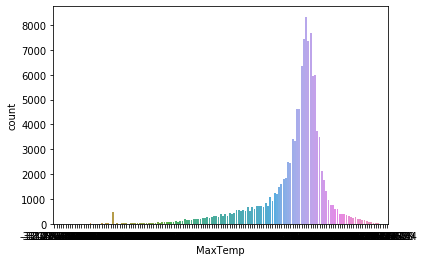

In [23]:
sns.countplot(x='MaxTemp',data=climate)

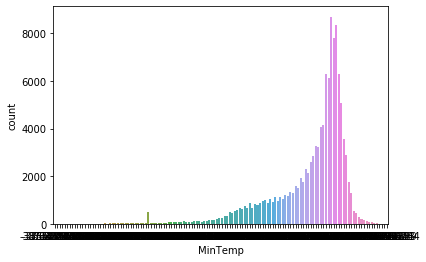

In [24]:
sns.countplot(x='MinTemp',data=climate)

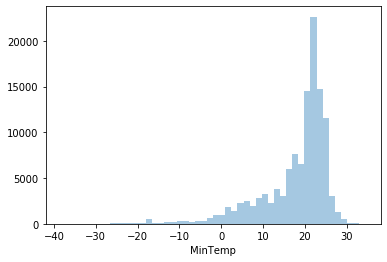

In [25]:
sns.distplot(climate['MinTemp'],kde = False)

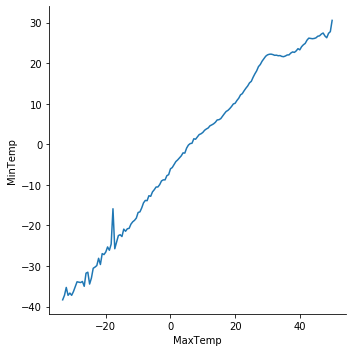

In [26]:
sns.relplot(data=climate, x="MaxTemp", y="MinTemp",kind="line",ci=None)

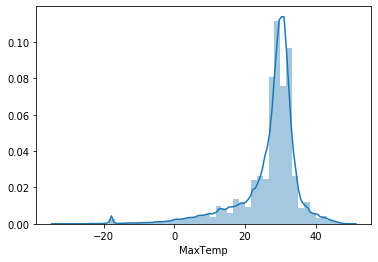

In [27]:
sns.distplot(climate['MaxTemp'])

In [28]:
y =climate['MaxTemp']

In [29]:
X=climate['MinTemp']

In [30]:

X=climate.iloc[:,:1].values
y=climate.iloc[:, 2].values
print(X)
print(y)

[[25.55555556]
 [28.88888889]
 [26.11111111]
 ...
 [28.33333333]
 [28.33333333]
 [29.44444444]]
[23.88888889 25.55555556 24.44444444 ... 23.33333333 23.33333333
 23.33333333]


## Splitting the dataset into train and test

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state=0)

###  Importing linear regression model from sklearn  to train the simple regression model

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction of  the  results

In [33]:
y_pred= regressor.predict(X_test)
print(y_pred)

[24.11738144 26.16663912 22.58043817 ... 26.16663912 26.16663912
 31.28978333]


## Accuracy score

In [34]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9345227711348363

# Thank you!